[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                           text sentiment
0           Regret buying this.  Negative
1  Not happy with the purchase.  Negative
2            This is fantastic!  Positive
3        Worst experience ever.  Negative
4                This is awful!  Negative


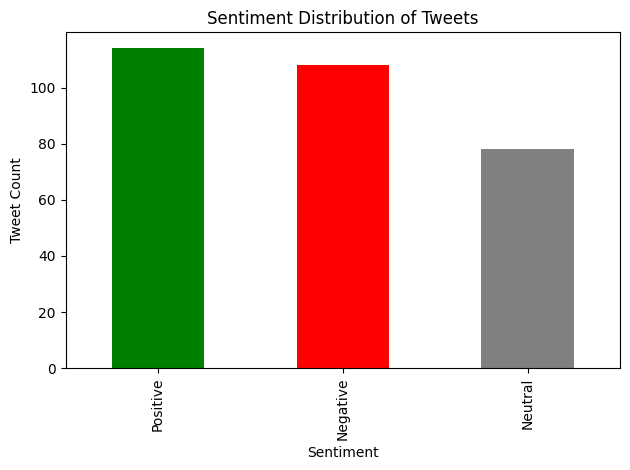


✅ Analysis complete! Results saved to 'twitter_sentiment_results.csv'


In [8]:
# simple_twitter_sentiment.py
# Simple Sentiment Analysis of Twitter Data using VADER

import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import matplotlib.pyplot as plt

# Download the VADER lexicon (run only once)
nltk.download('vader_lexicon')

# Step 1: Load your dataset
df = pd.read_csv("twitter_sentiment_300.csv")

# If your text column name is different, change 'text' accordingly
if 'text' not in df.columns:
    raise ValueError("CSV file must contain a column named 'text'.")

# Step 2: Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Step 3: Apply sentiment scoring
df['compound'] = df['text'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])

# Step 4: Classify sentiment based on compound score
def label_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['compound'].apply(label_sentiment)

# Step 5: Show sample results
print(df[['text', 'sentiment']].head())

# Step 6: Visualize sentiment distribution
df['sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution of Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Count')
plt.tight_layout()
plt.savefig("sentiment_distribution.png")
plt.show()

# Step 7: Save results
df.to_csv("twitter_sentiment_results.csv", index=False)
print("\n✅ Analysis complete! Results saved to 'twitter_sentiment_results.csv'")
